# Download OpenMIC Dataset

In [2]:
# Download original zip
!wget https://zenodo.org/record/1432913/files/openmic-2018-v1.0.0.tgz

--2022-10-15 13:16:18--  https://zenodo.org/record/1432913/files/openmic-2018-v1.0.0.tgz
Resolving zenodo.org (zenodo.org)... 188.184.117.155
Connecting to zenodo.org (zenodo.org)|188.184.117.155|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2623376754 (2.4G) [application/octet-stream]
Saving to: 'openmic-2018-v1.0.0.tgz'

openmic-2018-v1.0.0 100%[===================>]   2.44G  27.3MB/s    in 94s     

2022-10-15 13:17:53 (26.5 MB/s) - 'openmic-2018-v1.0.0.tgz' saved [2623376754/2623376754]



In [7]:
# Extract and delete the zip
!tar --extract --file openmic-2018-v1.0.0.tgz
!rm openmic-2018-v1.0.0.tgz

In [3]:
!pip install librosa

In [2]:
%conda install -c conda-forge librosa

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.10.3
  latest version: 22.9.0

Please update conda by running

    $ conda update -n base conda



## Package Plan ##

  environment location: /home/studio-lab-user/.conda/envs/default

  added / updated specs:
    - librosa


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    aom-3.5.0                  |       h27087fc_0         2.7 MB  conda-forge
    appdirs-1.4.4              |     pyh9f0ad1d_0          13 KB  conda-forge
    audioread-3.0.0            |   py39hf3d152e_0          34 KB  conda-forge
    brotli-1.0.9               |       h166bdaf_7          18 KB  conda-forge
    brotli-bin-1.0.9           |       h166bdaf_7          19 KB  conda-forge
    brotlipy-0.7.0             |py39hb9d737c_1004         342 KB  conda-forge
    certifi-2022.9.24          |     pyhd8ed1ab_0         155 

# Convert to log mel

In [2]:
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
!mkdir log_mel_OpenMIC

In [3]:
files = ['openmic-2018/audio/000/000046_3840.ogg'] # we can make a list comprehension of all files needed
save_path = "log_mel_OpenMIC/" 

/tmp/ipykernel_1064/124365548.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.15737659 -0.15117157
 -0.1723783 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spectrogram = librosa.feature.melspectrogram(scale, sr=sampling_rate, n_fft=2048, hop_length=512, n_mels=128)


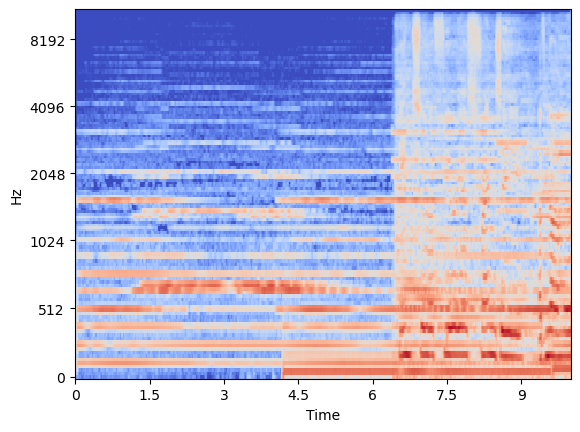

In [5]:
for file in files:
  scale, sampling_rate = librosa.load(file)
  # filter_banks = librosa.filters.mel(n_fft=2048, sr=22050, n_mels=10)
  mel_spectrogram = librosa.feature.melspectrogram(scale, sr=sampling_rate, n_fft=2048, hop_length=512, n_mels=128)
  log_mel_spectrogram = librosa.power_to_db(mel_spectrogram)
  img = librosa.display.specshow(log_mel_spectrogram, x_axis="time", y_axis="mel", sr=sampling_rate)
  # print(log_mel_spectrogram.shape)
  # print(type(log_mel_spectrogram))

  plt.savefig((save_path + file.split('/')[-1]).replace(".ogg", ".png"))
  # CURRENTLY saves with just filename without the 000 folder structure as the
  # first 3 numbers of filename indicate the folder anyway

# Understand array of mel spectrogram

In [3]:
ogg_file = "/home/studio-lab-user/sagemaker-studiolab-notebooks/openmic-2018/audio-ogg/000/000046_3840.ogg"

/tmp/ipykernel_3304/3661706879.py:3: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.15737659 -0.15117157
 -0.1723783 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spectrogram = librosa.feature.melspectrogram(scale, sr=sampling_rate, n_fft=2048, hop_length=512, n_mels=128)


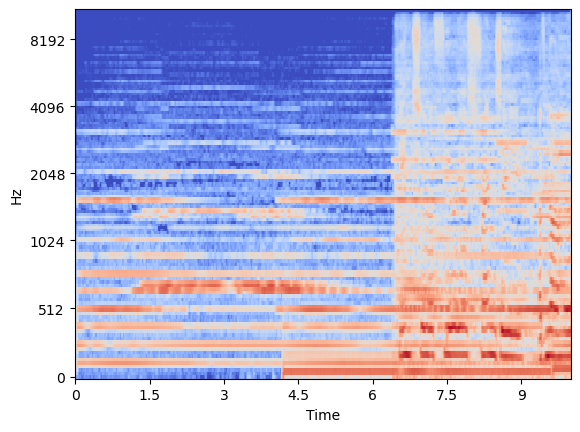

In [4]:
scale, sampling_rate = librosa.load(ogg_file)
# filter_banks = librosa.filters.mel(n_fft=2048, sr=22050, n_mels=10)
mel_spectrogram = librosa.feature.melspectrogram(scale, sr=sampling_rate, n_fft=2048, hop_length=512, n_mels=128)
log_mel_spectrogram = librosa.power_to_db(mel_spectrogram)
img = librosa.display.specshow(log_mel_spectrogram, x_axis="time", y_axis="mel", sr=sampling_rate)

In [6]:
log_mel_spectrogram

array([[-42.095856  , -31.424107  , -31.9088    , ...,  -3.0568552 ,
         -2.2507117 ,   0.18240468],
       [-36.341637  , -22.292805  , -21.728956  , ...,   2.6653411 ,
          2.106315  ,   3.9009383 ],
       [-32.328793  , -14.809451  , -13.8887825 , ...,  19.166454  ,
         18.851929  ,  17.826828  ],
       ...,
       [-50.30248   , -50.30248   , -50.30248   , ..., -23.627869  ,
        -23.616217  , -25.256073  ],
       [-50.30248   , -50.30248   , -50.30248   , ..., -34.40582   ,
        -33.597847  , -31.37908   ],
       [-50.30248   , -50.30248   , -50.30248   , ..., -50.30248   ,
        -50.30248   , -34.225533  ]], dtype=float32)

In [7]:
log_mel_spectrogram.shape

(128, 431)

/tmp/ipykernel_3304/2668324711.py:3: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.15737659 -0.15117157
 -0.1723783 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spectrogram = librosa.feature.melspectrogram(scale, sr=sampling_rate, n_fft=2048, hop_length=512, n_mels=64)


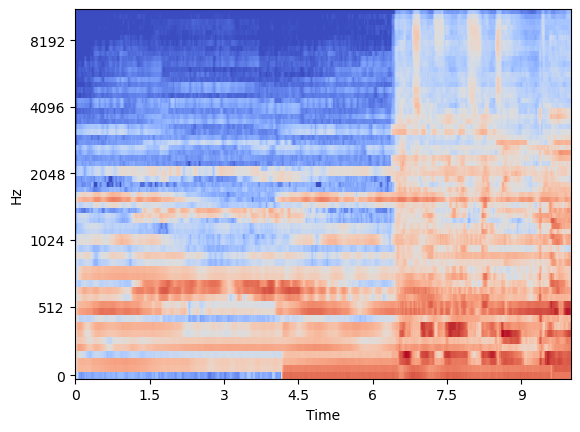

In [8]:
scale, sampling_rate = librosa.load(ogg_file)
# filter_banks = librosa.filters.mel(n_fft=2048, sr=22050, n_mels=10)
mel_spectrogram = librosa.feature.melspectrogram(scale, sr=sampling_rate, n_fft=2048, hop_length=512, n_mels=64)
log_mel_spectrogram = librosa.power_to_db(mel_spectrogram)
img = librosa.display.specshow(log_mel_spectrogram, x_axis="time", y_axis="mel", sr=sampling_rate)

In [10]:
log_mel_spectrogram

array([[-35.636105 , -19.59031  , -18.786911 , ...,  13.213369 ,
         12.888636 ,  12.05975  ],
       [-31.241438 ,  -8.132961 ,  -1.443252 , ...,  16.922297 ,
         16.89223  ,  16.27248  ],
       [-34.178032 , -10.001013 ,  -1.6294706, ...,  18.449272 ,
         18.339058 ,  17.453108 ],
       ...,
       [-52.77848  , -52.77848  , -52.77848  , ..., -26.98592  ,
        -26.542973 , -26.466736 ],
       [-52.77848  , -52.77848  , -52.77848  , ..., -24.557383 ,
        -24.294817 , -26.143759 ],
       [-52.77848  , -52.77848  , -52.77848  , ..., -29.268833 ,
        -29.120943 , -29.35487  ]], dtype=float32)

In [9]:
log_mel_spectrogram.shape

(64, 431)